__Notebook Description:__

Notebook to check newly generated ensemble files, to be added for case studies

# Imports

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from netCDF4 import date2index
from datetime import datetime

%matplotlib inline

# Cloudy cases

## Jan 04 23:00 UTC

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


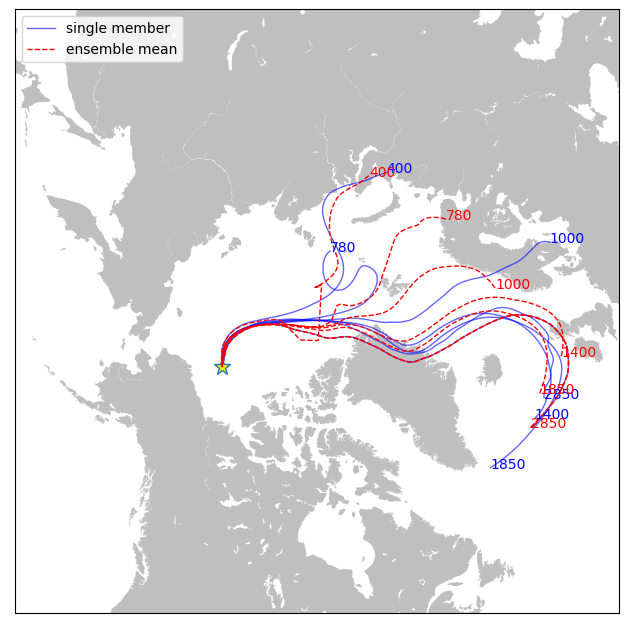

In [50]:
# path to all trajectory files
path = '/home/ollie/muali/Data/winter_all/'
dates = datetime(1998,1,4,23)
levels= ['400', '780', '1000', '1400', '1850', '2850']
date_str = '{:%m_%d_%H}'.format(dates)

# plotting trajectories
fig = plt.figure(figsize=(12,8), dpi=100)

m = Basemap(projection='npstere',boundinglat=50,lon_0=270,resolution='l')    

m.fillcontinents(color='0.75')

for lvl in levels:
    df = pd.read_csv(path+'tdump_'+lvl+'_'+date_str, skiprows=7, header=None, delim_whitespace=True)

#taking lat lons of the trajectories to be plotted
    lat = np.array(df.iloc[:, 9].copy())
    lon = np.array(df.iloc[:, 10].copy())

#Convert lat lon to map coordinates
    x, y = m(lon, lat)

#Plot the points on the map
    plt.plot(x, y,linewidth=1.0, color='blue', alpha=0.6)
    if lvl is levels[-1]:
        plt.plot(x_mean, y_mean, linewidth=1.0, color='blue', alpha=0.6, label='single member')

#source point
    xpt, ypt = m(lon[-1], lat[-1])
    plt.text(xpt,ypt,lvl, fontsize=10, color='blue')
      
    #SHEBA point
x_s, y_s = m(lon[0], lat[0])
plt.plot(x_s, y_s, marker = '*', markerfacecolor='#ffed00', linewidth=0, markersize=12)
    
## plotting ensemble trajectories ##

path2 = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/'



for lvl in levels:

    #file_name = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/1850/tdump_1850_01_04_23'
    df2 = pd.read_csv(path2 + lvl + '/tdump_'+lvl+'_'+date_str, skiprows=33, header=None, delim_whitespace=True) 
    cols_renames = {2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute'}


    # converting year to 4 digits
    df2.iloc[:,2] = df2.iloc[:,2] + 1900

    # df_subset is used to merge yy, mm, dd, hh values into BT_time column
    df_subset = df2.loc[:, list(cols_renames.keys())].rename(columns=cols_renames)
    dt_series = pd.to_datetime(df_subset)
    dt_series.head()
    # adding a new backtrajectory column
    df2['BT_time'] = dt_series

    # dropping the not required columns
    df2.drop([1,2,3,4,5,6,7], axis =1, inplace=True)
    col_rename2 = {0:'ensemble member',8: 'back_hr', 9:'Lat', 10: 'Lon', 11:'AGL', 12:'Pressure'}
    df2.rename(columns=col_rename2, inplace=True)
    del df_subset
    del dt_series
    # grouping by back hour sorts the ensemble members and taking the average gives mean of the ensemble members
    df_mean = df2.groupby(df2['back_hr']).mean()
    # lat1 is ensemble lats, lat2 is single traj lats
    lat_mean = df_mean['Lat'].values
    lon_mean = df_mean['Lon'].values


# """Plot the mean ensemble trajectories. Pass the lat, lon after applying groupby"""
    x_mean, y_mean = m(lon_mean, lat_mean)
    plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red')
    
    if lvl is levels[-1]:
        plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red', label='ensemble mean')
    
    plt.text(x_mean[0], y_mean[0], lvl, fontsize=10, color='red')
       
    

plt.legend(loc='upper left');
#plt.title('Ensemble mean vs single member for 1850m');
        

## Try with standard deviation

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


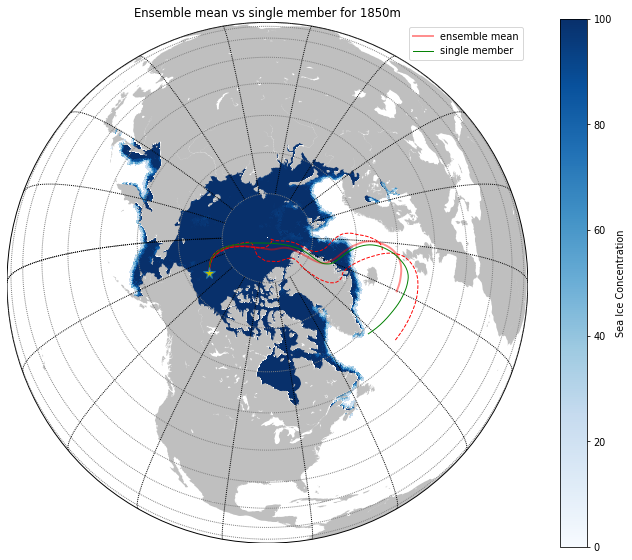

In [22]:
# path to all trajectory files
file_1000= '/home/ollie/muali/Data/winter_all/tdump_1850_01_04_23'
# path to all trajectory files
df_1000 = pd.read_csv(file_1000, skiprows=7, header=None, delim_whitespace=True)
lat2_1000 = np.array(df_1000.iloc[:, 9].copy())
lon2_1000 = np.array(df_1000.iloc[:, 10].copy())

# lat1 is ensemble lats, lat2 is single traj lats
lat1_1000_1=df_mean_1850['Lat'].values + df_std_1850['Lat'].values
lon1_1000_1=df_mean_1850['Lon'].values + df_std_1850['Lon'].values

lat1_1000_2=df_mean_1850['Lat'].values - df_std_1850['Lat'].values
lon1_1000_2=df_mean_1850['Lon'].values - df_std_1850['Lon'].values


"""Plot the mean ensemble trajectories. Pass the lat, lon after applying groupby"""
fig = plt.figure(figsize=(12,10), dpi=70)
        # plt.figure(figsize=(10,8))
        
m = Basemap(projection='ortho', lat_0=80, lon_0=270, resolution='l')
    

m.fillcontinents(color='0.75')
m.drawparallels(np.arange(-80.,81.,10.), color='grey') # lat andd lons at 20 degrees
m.drawmeridians(np.arange(-180.,181.,20.)) # longittudes
   
# Reading Sea Ice data
filename_ = '/home/ollie/muali/Data/G10010_SeaIce/G10010_SIBT1850_v1.1.nc'
ds = Dataset(filename_)
        
# to get the time index out of the netcdf variable
# change it according to the month you want to plot
# Eg, dec here
# timeindex gives you the index of in the netcdf file
        
timeindex = date2index(datetime(1998,1,15),ds.variables['time'])
lats_ice = ds.variables['latitude'][:]
lons_ice = ds.variables['longitude'][:]
    
 #note that lon goes from 0 to 360
# should we do a -180 here? No, basemap adjusts it automatically
# creating our meshgrid according to data coordinates given

lon_ice, lat_ice = np.meshgrid(lons_ice, lats_ice)
# meshgrid creates a coordinate system with our axis supplied

# getting seaice for SHEBA december as an eg but it works for all months
sea_ice_dec = ds.variables['seaice_conc'][timeindex,:,:] # month dependent on user date
# masking the low seaice concentration value
# check low sea ice value by np.sea_ice_dec.mina
# masking since min sea Ice is -1 for continents
sea_ice_dec = np.ma.masked_where(sea_ice_dec<=0,sea_ice_dec) 
ds.close()
        
# plotting Sea Ice
m.pcolormesh(lon_ice, lat_ice, sea_ice_dec, latlon=True, cmap='Blues')
plt.clim(0, 100) # Set the color limits of the current image
plt.colorbar(label='Sea Ice Concentration')

    
#Plot the trajectories points on the map
x1, y1 = m(lon1_1000, lat1_1000)
x2, y2 = m(lon2_1000, lat2_1000)
x3,y3 = m(lon1_1000_1, lat1_1000_1)
x4,y4 = m(lon1_1000_2, lat1_1000_2)

plt.plot(x1, y1, linewidth=2.0, color='red', alpha=0.45, label='ensemble mean')
plt.plot(x3, y3, '--' , linewidth=1.0, color='red')
plt.plot(x4,y4, '--', linewidth=1.0, color='red')
plt.plot(x2, y2, linewidth=1.0, color='g', label='single member' )
        
#source point 
xpt, ypt = m(lon1_1000[-1], lat1_1000[-1]) #marker at SHEBA
plt.plot(xpt, ypt, marker = '*', markerfacecolor='y', linewidth=0, markersize=12)

        
    

# Reading IGRA list to plot stations
# df_IGRA = pd.read_excel('/home/ollie/muali/python_notebook_ollie/IGR_Above_25Lat.xlsx')
# df_IGRA2 = df_IGRA.loc[df_IGRA['Lat'] > 55.]
# station_lat = df_IGRA2['Lat'].values
# station_lon = df_IGRA2['Lon'].values
# station_x, station_y = m(station_lon, station_lat)
# m.scatter(station_x, station_y, marker = '*', c='#ffed00', s=45, linewidth=0.2, zorder=10)

plt.legend()
plt.title('Ensemble mean vs single member for 1850m');


## Jan 05 00 UTC

__Checking flow regime for one hour later for the above case__

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


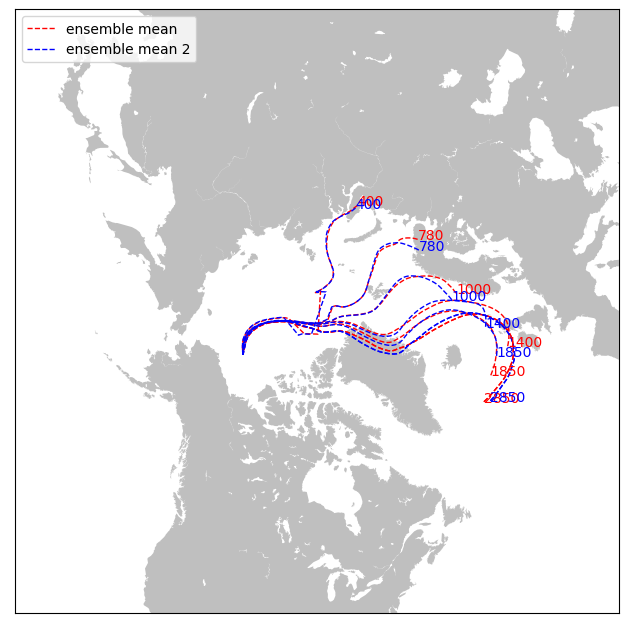

In [57]:
path2 = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/'
dates = datetime(1998,1,4,23)
levels= ['400', '780', '1000', '1400', '1850', '2850']
date_str = '{:%m_%d_%H}'.format(dates)
fig = plt.figure(figsize=(12,8), dpi=100)

m = Basemap(projection='npstere',boundinglat=40,lon_0=270,resolution='l')    

m.fillcontinents(color='0.75')


for lvl in levels:

    #file_name = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/1850/tdump_1850_01_04_23'
    df2 = pd.read_csv(path2 + lvl + '/tdump_'+lvl+'_'+date_str, skiprows=33, header=None, delim_whitespace=True) 
    cols_renames = {2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute'}


    # converting year to 4 digits
    df2.iloc[:,2] = df2.iloc[:,2] + 1900

    # df_subset is used to merge yy, mm, dd, hh values into BT_time column
    df_subset = df2.loc[:, list(cols_renames.keys())].rename(columns=cols_renames)
    dt_series = pd.to_datetime(df_subset)
    dt_series.head()
    # adding a new backtrajectory column
    df2['BT_time'] = dt_series

    # dropping the not required columns
    df2.drop([1,2,3,4,5,6,7], axis =1, inplace=True)
    col_rename2 = {0:'ensemble member',8: 'back_hr', 9:'Lat', 10: 'Lon', 11:'AGL', 12:'Pressure'}
    df2.rename(columns=col_rename2, inplace=True)
    del df_subset
    del dt_series
    # grouping by back hour sorts the ensemble members and taking the average gives mean of the ensemble members
    df_mean = df2.groupby(df2['back_hr']).mean()
    # lat1 is ensemble lats, lat2 is single traj lats
    lat_mean = df_mean['Lat'].values
    lon_mean = df_mean['Lon'].values


# """Plot the mean ensemble trajectories. Pass the lat, lon after applying groupby"""
    x_mean, y_mean = m(lon_mean, lat_mean)
    plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red')
    
    if lvl is levels[-1]:
        plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red', label='ensemble mean')
    
    plt.text(x_mean[0], y_mean[0], lvl, fontsize=10, color='red')

dates = datetime(1998,1,5,0)
levels= ['400', '780', '1000', '1400', '1850', '2850']
date_str = '{:%m_%d_%H}'.format(dates)
for lvl in levels:

    #file_name = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/1850/tdump_1850_01_04_23'
    df2 = pd.read_csv(path2 + lvl + '/tdump_'+lvl+'_'+date_str, skiprows=33, header=None, delim_whitespace=True) 
    cols_renames = {2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute'}


    # converting year to 4 digits
    df2.iloc[:,2] = df2.iloc[:,2] + 1900

    # df_subset is used to merge yy, mm, dd, hh values into BT_time column
    df_subset = df2.loc[:, list(cols_renames.keys())].rename(columns=cols_renames)
    dt_series = pd.to_datetime(df_subset)
    dt_series.head()
    # adding a new backtrajectory column
    df2['BT_time'] = dt_series

    # dropping the not required columns
    df2.drop([1,2,3,4,5,6,7], axis =1, inplace=True)
    col_rename2 = {0:'ensemble member',8: 'back_hr', 9:'Lat', 10: 'Lon', 11:'AGL', 12:'Pressure'}
    df2.rename(columns=col_rename2, inplace=True)
    del df_subset
    del dt_series
    # grouping by back hour sorts the ensemble members and taking the average gives mean of the ensemble members
    df_mean = df2.groupby(df2['back_hr']).mean()
    # lat1 is ensemble lats, lat2 is single traj lats
    lat_mean = df_mean['Lat'].values
    lon_mean = df_mean['Lon'].values


# """Plot the mean ensemble trajectories. Pass the lat, lon after applying groupby"""
    x_mean, y_mean = m(lon_mean, lat_mean)
    plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='blue')
    
    if lvl is levels[-1]:
        plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='blue', label='ensemble mean 2')
    
    plt.text(x_mean[0], y_mean[0], lvl, fontsize=10, color='blue')
       
    

plt.legend(loc='upper left');    


#plt.title('Ensemble mean vs single member for 1850m');
        

Observation: Flow regime is pretty consistent for even an hour later.

## 10 Jan 23:00 case

The `NY-Alesund` case

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


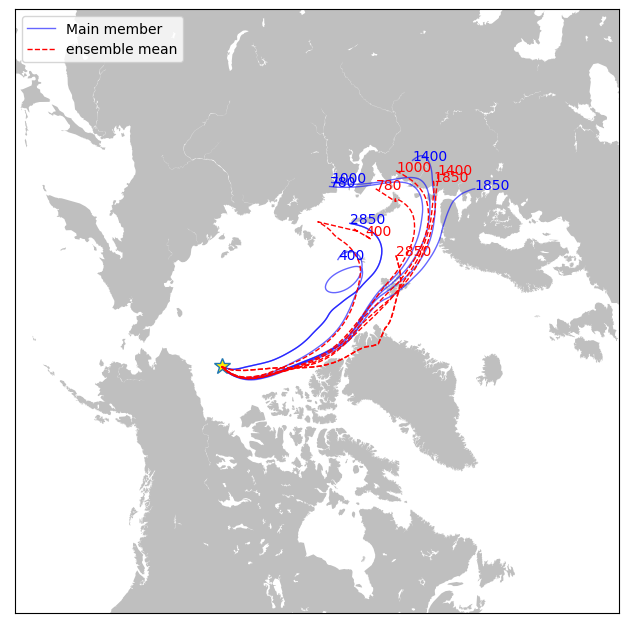

In [60]:
# path to all trajectory files
path = '/home/ollie/muali/Data/winter_all/'
dates = datetime(1998,1,10,23)
levels= ['400', '780', '1000', '1400', '1850', '2850']
date_str = '{:%m_%d_%H}'.format(dates)

# plotting trajectories
fig = plt.figure(figsize=(12,8), dpi=100)

m = Basemap(projection='npstere',boundinglat=50,lon_0=270,resolution='l')    

m.fillcontinents(color='0.75')

for lvl in levels:
    df = pd.read_csv(path+'tdump_'+lvl+'_'+date_str, skiprows=7, header=None, delim_whitespace=True)

#taking lat lons of the trajectories to be plotted
    lat = np.array(df.iloc[:, 9].copy())
    lon = np.array(df.iloc[:, 10].copy())

#Convert lat lon to map coordinates
    x, y = m(lon, lat)

#Plot the points on the map
    plt.plot(x, y,linewidth=1.0, color='blue', alpha=0.6)
    if lvl is levels[-1]:
        plt.plot(x, y, linewidth=1.0, color='blue', alpha=0.6, label='Main member')

#source point
    xpt, ypt = m(lon[-1], lat[-1])
    plt.text(xpt,ypt,lvl, fontsize=10, color='blue')
      
    #SHEBA point
x_s, y_s = m(lon[0], lat[0])
plt.plot(x_s, y_s, marker = '*', markerfacecolor='#ffed00', linewidth=0, markersize=12)
    
## plotting ensemble trajectories ##

path2 = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/'

for lvl in levels:

    #file_name = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/1850/tdump_1850_01_04_23'
    df2 = pd.read_csv(path2 + lvl + '/tdump_'+lvl+'_'+date_str, skiprows=33, header=None, delim_whitespace=True) 
    cols_renames = {2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute'}


    # converting year to 4 digits
    df2.iloc[:,2] = df2.iloc[:,2] + 1900

    # df_subset is used to merge yy, mm, dd, hh values into BT_time column
    df_subset = df2.loc[:, list(cols_renames.keys())].rename(columns=cols_renames)
    dt_series = pd.to_datetime(df_subset)
    dt_series.head()
    # adding a new backtrajectory column
    df2['BT_time'] = dt_series

    # dropping the not required columns
    df2.drop([1,2,3,4,5,6,7], axis =1, inplace=True)
    col_rename2 = {0:'ensemble member',8: 'back_hr', 9:'Lat', 10: 'Lon', 11:'AGL', 12:'Pressure'}
    df2.rename(columns=col_rename2, inplace=True)
    del df_subset
    del dt_series
    # grouping by back hour sorts the ensemble members and taking the average gives mean of the ensemble members
    df_mean = df2.groupby(df2['back_hr']).mean()
    # lat1 is ensemble lats, lat2 is single traj lats
    lat_mean = df_mean['Lat'].values
    lon_mean = df_mean['Lon'].values


# """Plot the mean ensemble trajectories. Pass the lat, lon after applying groupby"""
    x_mean, y_mean = m(lon_mean, lat_mean)
    plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red')
    
    if lvl is levels[-1]:
        plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red', label='ensemble mean')
    
    plt.text(x_mean[0], y_mean[0], lvl, fontsize=10, color='red')    

plt.legend(loc='upper left');

        

__Observations:__ High difference between ensemble mean and main member for 400, 2850 m. But the observations for case studies are based on 1000, 1400 and 1850m which show good agreement between main member and ensemble mean

There is certainly mixing of different air masses going on here. For example: For this case the air mass on 1850m at SHEBA starts around 300 m at the source.




__Doubt/Discussion:__  _Comparision in the profiles of the same height range:_
One scenario could be that the air mass in our analysis range of roughly 700-2500 m at SHEBA might be subducted from let's say, above 3500 m or in an extreme case, above 500 hPa. So, the visualization of air mass transformation through our profiles will miss such a case since we plot the column below 500 hPa. 

In other words, from the stations, we should _only_ extract the height range of the column through which the trajectories are passing by for comparision.

But on second thought, what we're saying in the analysis is that we don't care about vertical mixing because we are looking on the mid-level atmospheric column as a whole. So, our snapshots are conveying the information about the air column as a whole at a given point in time.

_Should we include height of the trajectories for one of the cases to get accross our idea of following the air column as whole and probably also showing that the air column we're looking at SHEBA is not getting subducting from absurd heights?_

# 28 Jan 23:00 Case

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


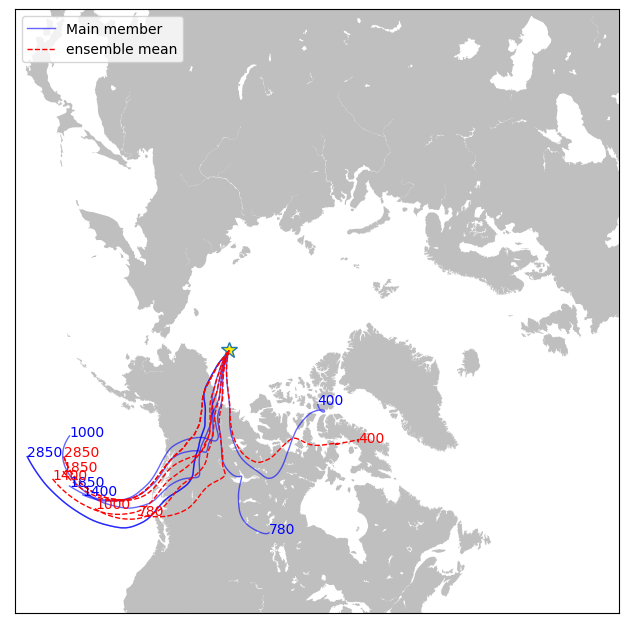

In [64]:
# path to all trajectory files
path = '/home/ollie/muali/Data/winter_all/'
dates = datetime(1998,1,28,23)
levels= ['400', '780', '1000', '1400', '1850', '2850']
date_str = '{:%m_%d_%H}'.format(dates)

# plotting trajectories
fig = plt.figure(figsize=(12,8), dpi=100)

m = Basemap(projection='npstere',boundinglat=45,lon_0=270,resolution='l')    

m.fillcontinents(color='0.75')

for lvl in levels:
    df = pd.read_csv(path+'tdump_'+lvl+'_'+date_str, skiprows=7, header=None, delim_whitespace=True)

#taking lat lons of the trajectories to be plotted
    lat = np.array(df.iloc[:, 9].copy())
    lon = np.array(df.iloc[:, 10].copy())

#Convert lat lon to map coordinates
    x, y = m(lon, lat)

#Plot the points on the map
    plt.plot(x, y,linewidth=1.0, color='blue', alpha=0.6)
    if lvl is levels[-1]:
        plt.plot(x, y, linewidth=1.0, color='blue', alpha=0.6, label='Main member')

#source point
    xpt, ypt = m(lon[-1], lat[-1])
    plt.text(xpt,ypt,lvl, fontsize=10, color='blue')
      
    #SHEBA point
x_s, y_s = m(lon[0], lat[0])
plt.plot(x_s, y_s, marker = '*', markerfacecolor='#ffed00', linewidth=0, markersize=12)
    
## plotting ensemble trajectories ##

path2 = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/'

for lvl in levels:

    #file_name = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/1850/tdump_1850_01_04_23'
    df2 = pd.read_csv(path2 + lvl + '/tdump_'+lvl+'_'+date_str, skiprows=33, header=None, delim_whitespace=True) 
    cols_renames = {2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute'}


    # converting year to 4 digits
    df2.iloc[:,2] = df2.iloc[:,2] + 1900

    # df_subset is used to merge yy, mm, dd, hh values into BT_time column
    df_subset = df2.loc[:, list(cols_renames.keys())].rename(columns=cols_renames)
    dt_series = pd.to_datetime(df_subset)
    dt_series.head()
    # adding a new backtrajectory column
    df2['BT_time'] = dt_series

    # dropping the not required columns
    df2.drop([1,2,3,4,5,6,7], axis =1, inplace=True)
    col_rename2 = {0:'ensemble member',8: 'back_hr', 9:'Lat', 10: 'Lon', 11:'AGL', 12:'Pressure'}
    df2.rename(columns=col_rename2, inplace=True)
    del df_subset
    del dt_series
    # grouping by back hour sorts the ensemble members and taking the average gives mean of the ensemble members
    df_mean = df2.groupby(df2['back_hr']).mean()
    # lat1 is ensemble lats, lat2 is single traj lats
    lat_mean = df_mean['Lat'].values
    lon_mean = df_mean['Lon'].values


# """Plot the mean ensemble trajectories. Pass the lat, lon after applying groupby"""
    x_mean, y_mean = m(lon_mean, lat_mean)
    plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red')
    
    if lvl is levels[-1]:
        plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red', label='ensemble mean')
    
    plt.text(x_mean[0], y_mean[0], lvl, fontsize=10, color='red')    

plt.legend(loc='upper left');

# Clear Case

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


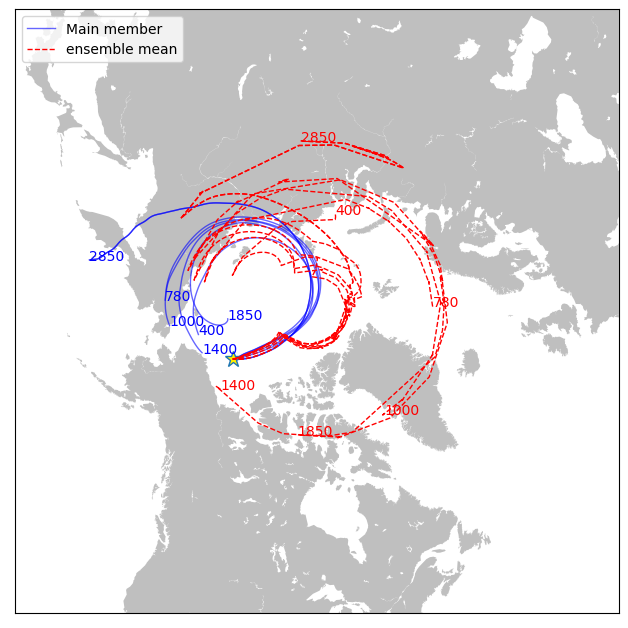

In [2]:
# path to all trajectory files
path = '/home/ollie/muali/Data/winter_all/'
dates = datetime(1998,1,12,11)
levels= ['400', '780', '1000', '1400', '1850', '2850']
date_str = '{:%m_%d_%H}'.format(dates)

# plotting trajectories
fig = plt.figure(figsize=(12,8), dpi=100)

m = Basemap(projection='npstere',boundinglat=45,lon_0=270,resolution='l')    

m.fillcontinents(color='0.75')

for lvl in levels:
    df = pd.read_csv(path+'tdump_'+lvl+'_'+date_str, skiprows=7, header=None, delim_whitespace=True)

#taking lat lons of the trajectories to be plotted
    lat = np.array(df.iloc[:, 9].copy())
    lon = np.array(df.iloc[:, 10].copy())

#Convert lat lon to map coordinates
    x, y = m(lon, lat)

#Plot the points on the map
    plt.plot(x, y,linewidth=1.0, color='blue', alpha=0.6)
    if lvl is levels[-1]:
        plt.plot(x, y, linewidth=1.0, color='blue', alpha=0.6, label='Main member')

#source point
    xpt, ypt = m(lon[-1], lat[-1])
    plt.text(xpt,ypt,lvl, fontsize=10, color='blue')
      
    #SHEBA point
x_s, y_s = m(lon[0], lat[0])
plt.plot(x_s, y_s, marker = '*', markerfacecolor='#ffed00', linewidth=0, markersize=12)
    
## plotting ensemble trajectories ##

path2 = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/'

for lvl in levels:

    #file_name = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/1850/tdump_1850_01_04_23'
    df2 = pd.read_csv(path2 + lvl + '/tdump_'+lvl+'_'+date_str, skiprows=33, header=None, delim_whitespace=True) 
    cols_renames = {2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute'}


    # converting year to 4 digits
    df2.iloc[:,2] = df2.iloc[:,2] + 1900

    # df_subset is used to merge yy, mm, dd, hh values into BT_time column
    df_subset = df2.loc[:, list(cols_renames.keys())].rename(columns=cols_renames)
    dt_series = pd.to_datetime(df_subset)
    dt_series.head()
    # adding a new backtrajectory column
    df2['BT_time'] = dt_series

    # dropping the not required columns
    df2.drop([1,2,3,4,5,6,7], axis =1, inplace=True)
    col_rename2 = {0:'ensemble member',8: 'back_hr', 9:'Lat', 10: 'Lon', 11:'AGL', 12:'Pressure'}
    df2.rename(columns=col_rename2, inplace=True)
    del df_subset
    del dt_series
    # grouping by back hour sorts the ensemble members and taking the average gives mean of the ensemble members
    df_mean = df2.groupby(df2['back_hr']).mean()
    # lat1 is ensemble lats, lat2 is single traj lats
    lat_mean = df_mean['Lat'].values
    lon_mean = df_mean['Lon'].values


# """Plot the mean ensemble trajectories. Pass the lat, lon after applying groupby"""
    x_mean, y_mean = m(lon_mean, lat_mean)
    plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red')
    
    if lvl is levels[-1]:
        plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red', label='ensemble mean')
    
    plt.text(x_mean[0], y_mean[0], lvl, fontsize=10, color='red')    

plt.legend(loc='upper left');

__Observations:__ The explanation for the above case could be that the way ensemble trajectories are created by offsetting position, they get caught in an entirely different flow regime. There seems to be a cyclonic flow regime circumventing the inner anticyclonic flow.